In [4]:
import pandas as pd
import numpy as np
import geopandas as gp
import sys
sys.path.append('C:\Workspace\SOURCE\sf_taxi\sfdata_wrangler')
import DemandHelper

In [5]:
df_mat = 

SyntaxError: invalid syntax (<ipython-input-5-606c27e04d6c>, line 1)

In [12]:
df = pd.read_csv('E:\Transit-Casa-Alex\Input\LEHD Census Blocks\WAC\Original\ca_wac_S000_JT00_2009.csv')

In [8]:
blocks_fran = gp.read_file('E:/Transit-Casa-Alex/Input/2010 Census Blocks/San Francisco County/tl_2010_06075_tabblock10.shp')

In [9]:
blocks_mat = gp.read_file('E:/Transit-Casa-Alex/Input/2010 Census Blocks/San Mateo County/tl_2010_06081_tabblock10.shp')

In [10]:
blocks = blocks_fran.append(blocks_mat)

In [43]:
print(len(blocks_fran))
print(len(blocks_mat))
print(len(blocks_fran)+len(blocks_mat))
len(blocks)

7386
9262
16648


16648

In [51]:
blocks.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 16648 entries, 0 to 9261
Data columns (total 16 columns):
ALAND10       16648 non-null int64
AWATER10      16648 non-null int64
BLOCKCE10     16648 non-null object
COUNTYFP10    16648 non-null object
FUNCSTAT10    16648 non-null object
GEOID10       16648 non-null int64
INTPTLAT10    16648 non-null object
INTPTLON10    16648 non-null object
MTFCC10       16648 non-null object
NAME10        16648 non-null object
STATEFP10     16648 non-null object
TRACTCE10     16648 non-null object
UACE10        15696 non-null object
UATYP10       15696 non-null object
UR10          16648 non-null object
geometry      16648 non-null object
dtypes: int64(3), object(13)
memory usage: 2.2+ MB


In [16]:
blocks['GEOID10'] = blocks.GEOID10.apply(lambda row: int(row))

In [3]:
df.head()

,w_geocode,C000,CA01,CA02,CA03,CE01,CE02,CE03,CNS01,CNS02,...,CFA02,CFA03,CFA04,CFA05,CFS01,CFS02,CFS03,CFS04,CFS05,createdate
0,60014001001000,11,1,6,4,0,4,7,0,0,...,0,0,0,0,0,0,0,0,0,20160228
1,60014001001007,27,7,15,5,2,6,19,0,0,...,0,0,0,0,0,0,0,0,0,20160228
2,60014001001008,1,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,20160228
3,60014001001009,1,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,20160228
4,60014001001010,1,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,20160228


In [ ]:
#tried to use the script to procwess LODES but found it easier to just pull out the part where the employment categories were set 
DemandHelper.DemandHelper.processLODES('E:\Transit-Casa-Alex\Input\LEHD Census Blocks\ca_wac_S000_JT00_2009.csv/ca_wac_S000_JT00_2009.csv',lodesType = 'WAC',xwalkFIle)

In [53]:
blocks.head()

,ALAND10,AWATER10,BLOCKCE10,COUNTYFP10,FUNCSTAT10,GEOID10,INTPTLAT10,INTPTLON10,MTFCC10,NAME10,STATEFP10,TRACTCE10,UACE10,UATYP10,UR10,geometry
0,16958,0,2002,075,S,60750213002002,+37.7500665,-122.4410751,G5040,Block 2002,06,021300,78904,U,U,"POLYGON ((-122.440616 37.750902, -122.440459 3..."
1,16823,0,2000,075,S,60750213002000,+37.7501958,-122.4389330,G5040,Block 2000,06,021300,78904,U,U,"POLYGON ((-122.438397 37.750226, -122.43832 37..."
2,17020,0,3004,075,S,60750205003004,+37.7567937,-122.4362701,G5040,Block 3004,06,020500,78904,U,U,"POLYGON ((-122.435808 37.757623, -122.435642 3..."
3,16415,0,1003,075,S,60750212001003,+37.7535291,-122.4370498,G5040,Block 1003,06,021200,78904,U,U,"POLYGON ((-122.436527 37.75354, -122.436454 37..."
4,17523,0,4001,075,S,60750211004001,+37.7557580,-122.4334002,G5040,Block 4001,06,021100,78904,U,U,"POLYGON ((-122.432331 37.756227, -122.432254 3..."


In [15]:
df['TOTAL_EMP'] = df['C000']  
df['RETAIL'] = df['CNS07']
df['EDHEALTH'] = df['CNS15'] + df['CNS16']
df['LEISURE'] = df['CNS17'] + df['CNS17'] + df['CNS18']
df['OTHER'] = df['TOTAL_EMP'] - df['RETAIL'] - df['EDHEALTH'] - df['LEISURE']

In [26]:
df.head()

,w_geocode,C000,CA01,CA02,CA03,CE01,CE02,CE03,CNS01,CNS02,...,CFS02,CFS03,CFS04,CFS05,createdate,RETAIL,EDHEALTH,LEISURE,OTHER,TOTAL_EMP
0,60014001001000,11,1,6,4,0,4,7,0,0,...,0,0,0,0,20160228,0,0,0,11,11
1,60014001001007,27,7,15,5,2,6,19,0,0,...,0,0,0,0,20160228,0,0,0,27,27
2,60014001001008,1,0,1,0,0,0,1,0,0,...,0,0,0,0,20160228,0,0,0,1,1
3,60014001001009,1,0,1,0,0,0,1,0,0,...,0,0,0,0,20160228,0,0,0,1,1
4,60014001001010,1,0,1,0,0,1,0,0,0,...,0,0,0,0,20160228,0,0,0,1,1


In [27]:
for column in df.columns:
    print(column)

w_geocode
C000
CA01
CA02
CA03
CE01
CE02
CE03
CNS01
CNS02
CNS03
CNS04
CNS05
CNS06
CNS07
CNS08
CNS09
CNS10
CNS11
CNS12
CNS13
CNS14
CNS15
CNS16
CNS17
CNS18
CNS19
CNS20
CR01
CR02
CR03
CR04
CR05
CR07
CT01
CT02
CD01
CD02
CD03
CD04
CS01
CS02
CFA01
CFA02
CFA03
CFA04
CFA05
CFS01
CFS02
CFS03
CFS04
CFS05
createdate
RETAIL
EDHEALTH
LEISURE
OTHER
TOTAL_EMP


In [31]:
l = ['C000',
'CA01',
'CA02',
'CA03',
'CE01',
'CE02',
'CE03',
'CNS01',
'CNS02',
'CNS03',
'CNS04',
'CNS05',
'CNS06',
'CNS07',
'CNS08',
'CNS09',
'CNS10',
'CNS11',
'CNS12',
'CNS13',
'CNS14',
'CNS15',
'CNS16',
'CNS17',
'CNS18',
'CNS19',
'CNS20',
'CR01',
'CR02',
'CR03',
'CR04',
'CR05',
'CR07',
'CT01',
'CT02',
'CD01',
'CD02',
'CD03',
'CD04',
'CS01',
'CS02',
'CFA01',
'CFA02',
'CFA03',
'CFA04',
'CFA05',
'CFS01',
'CFS02',
'CFS03',
'CFS04',
'CFS05']

In [34]:
for column in l:
    df = df.drop(column,axis = 1)

In [35]:
df.head()

,w_geocode,createdate,RETAIL,EDHEALTH,LEISURE,OTHER,TOTAL_EMP
0,60014001001000,20160228,0,0,0,11,11
1,60014001001007,20160228,0,0,0,27,27
2,60014001001008,20160228,0,0,0,1,1
3,60014001001009,20160228,0,0,0,1,1
4,60014001001010,20160228,0,0,0,1,1


In [54]:
blocks.head()

,ALAND10,AWATER10,BLOCKCE10,COUNTYFP10,FUNCSTAT10,GEOID10,INTPTLAT10,INTPTLON10,MTFCC10,NAME10,STATEFP10,TRACTCE10,UACE10,UATYP10,UR10,geometry
0,16958,0,2002,075,S,60750213002002,+37.7500665,-122.4410751,G5040,Block 2002,06,021300,78904,U,U,"POLYGON ((-122.440616 37.750902, -122.440459 3..."
1,16823,0,2000,075,S,60750213002000,+37.7501958,-122.4389330,G5040,Block 2000,06,021300,78904,U,U,"POLYGON ((-122.438397 37.750226, -122.43832 37..."
2,17020,0,3004,075,S,60750205003004,+37.7567937,-122.4362701,G5040,Block 3004,06,020500,78904,U,U,"POLYGON ((-122.435808 37.757623, -122.435642 3..."
3,16415,0,1003,075,S,60750212001003,+37.7535291,-122.4370498,G5040,Block 1003,06,021200,78904,U,U,"POLYGON ((-122.436527 37.75354, -122.436454 37..."
4,17523,0,4001,075,S,60750211004001,+37.7557580,-122.4334002,G5040,Block 4001,06,021100,78904,U,U,"POLYGON ((-122.432331 37.756227, -122.432254 3..."


In [21]:
merge = pd.merge(blocks,df,how = 'left',left_on = 'GEOID10',right_on = 'w_geocode', suffixes = ('','_WAC'))

In [22]:
merge.head()

,ALAND10,AWATER10,BLOCKCE10,COUNTYFP10,FUNCSTAT10,GEOID10,INTPTLAT10,INTPTLON10,MTFCC10,NAME10,...,CFS02,CFS03,CFS04,CFS05,createdate,TOTAL_EMP,RETAIL,EDHEALTH,LEISURE,OTHER
0,16958,0,2002,075,S,60750213002002,+37.7500665,-122.4410751,G5040,Block 2002,...,0.0,0.0,0.0,0.0,20160228.0,7.0,0.0,7.0,0.0,0.0
1,16823,0,2000,075,S,60750213002000,+37.7501958,-122.4389330,G5040,Block 2000,...,0.0,0.0,0.0,0.0,20160228.0,1.0,0.0,0.0,0.0,1.0
2,17020,0,3004,075,S,60750205003004,+37.7567937,-122.4362701,G5040,Block 3004,...,0.0,0.0,0.0,0.0,20160228.0,1.0,0.0,0.0,0.0,1.0
3,16415,0,1003,075,S,60750212001003,+37.7535291,-122.4370498,G5040,Block 1003,...,0.0,0.0,0.0,0.0,20160228.0,22.0,0.0,8.0,0.0,14.0
4,17523,0,4001,075,S,60750211004001,+37.7557580,-122.4334002,G5040,Block 4001,...,0.0,0.0,0.0,0.0,20160228.0,3.0,0.0,1.0,0.0,2.0


In [60]:
for column in merge.columns:
    print(column)

ALAND10
AWATER10
BLOCKCE10
COUNTYFP10
FUNCSTAT10
GEOID10
INTPTLAT10
INTPTLON10
MTFCC10
NAME10
STATEFP10
TRACTCE10
UACE10
UATYP10
UR10
geometry
w_geocode
createdate
RETAIL
EDHEALTH
LEISURE
OTHER
TOTAL_EMP


In [61]:
l = ['INTPTLAT10',
'INTPTLON10',
'MTFCC10',
'NAME10',
'STATEFP10',
'TRACTCE10',
'UACE10',
'UATYP10',
'UR10',
'FUNCSTAT10']

In [62]:
for column in l:
    merge = merge.drop(column,axis = 1)

In [65]:
mat = merge[merge['COUNTYFP10'] == '081']

In [69]:
mat.to_file('San_Mateo_Employment.shp',driver = 'ESRI Shapefile')

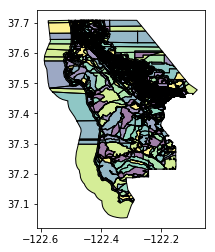

In [71]:
%matplotlib inline
mat.plot()

In [107]:
sf = gp.read_file('E:/Transit-Casa-Alex/Input/LEHD Census Blocks/San Francisco County (Processed)/Employment_StatePlane_SF.shp')

In [75]:
sf.head()

,ALAND10,AREA_FT,C000_RAC,C000_WAC,CA01_RAC,CA01_WAC,CA02_RAC,CA02_WAC,CA03_RAC,CA03_WAC,...,STATEFP10,TRACTCE10,UACE10,UATYP10,UR10,createda_1,createdate,geometry,h_geocode,w_geocode
0,243533,0,15.0,793.0,6.0,213.0,8.0,402.0,1.0,178.0,...,06,010100,78904,U,U,20130528.0,20130528.0,"POLYGON ((1830954.133219415 647010.6166856661,...",6.075010e+13,6.075010e+13
1,3062,32958,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,06,010100,78904,U,U,0.0,0.0,"POLYGON ((1832206.235716464 646724.4848942617,...",0.000000e+00,0.000000e+00
2,1323,14243,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,06,010100,78904,U,U,0.0,0.0,"POLYGON ((1832063.007634928 646805.6637669597,...",0.000000e+00,0.000000e+00
3,15453,0,0.0,408.0,0.0,140.0,0.0,243.0,0.0,25.0,...,06,010100,78904,U,U,0.0,20130528.0,"POLYGON ((1831606.279485152 646953.3022787124,...",0.000000e+00,6.075010e+13
4,11450,0,0.0,131.0,0.0,30.0,0.0,55.0,0.0,46.0,...,06,010100,78904,U,U,0.0,20130528.0,"POLYGON ((1830954.133219415 647010.6166856661,...",0.000000e+00,6.075010e+13


In [108]:
l = [
'INTPTLAT10',
'INTPTLON10',
'LEISURE_RA',
'MTFCC10',
'OTHER_RAC',
'UACE10',
'UATYP10',
'UR10',
'createda_1',
'CA01_RAC',
'CA01_WAC',
'CA02_RAC',
'CA02_WAC',
'CA03_RAC',
'CA03_WAC',
'CD01_RAC',
'CD01_WAC',
'CD02_RAC',
'CD02_WAC',
'CD03_RAC',
'CD03_WAC',
'CD04_RAC',
'CD04_WAC',
'CE01_RAC',
'CE01_WAC',
'CE02_RAC',
'CE02_WAC',
'CE03_RAC',
'CE03_WAC',
'CFA01',
'CFA02',
'CFA03',
'CFA04',
'CFA05',
'CFS01',
'CFS02',
'CFS03',
'CFS04',
'CFS05',
'CNS01_RAC',
'CNS01_WAC',
'CNS02_RAC',
'CNS02_WAC',
'CNS03_RAC',
'CNS03_WAC',
'CNS04_RAC',
'CNS04_WAC',
'CNS05_RAC',
'CNS05_WAC',
'CNS06_RAC',
'CNS06_WAC',
'CNS07_RAC',
'CNS07_WAC',
'CNS08_RAC',
'CNS08_WAC',
'CNS09_RAC',
'CNS09_WAC',
'CNS10_RAC',
'CNS10_WAC',
'CNS11_RAC',
'CNS11_WAC',
'CNS12_RAC',
'CNS12_WAC',
'CNS13_RAC',
'CNS13_WAC',
'CNS14_RAC',
'CNS14_WAC',
'CNS15_RAC',
'CNS15_WAC',
'CNS16_RAC',
'CNS16_WAC',
'CNS17_RAC',
'CNS17_WAC',
'CNS18_RAC',
'CNS18_WAC',
'CNS19_RAC',
'CNS19_WAC',
'CNS20_RAC',
'CNS20_WAC',
'CR01_RAC',
'CR01_WAC',
'CR02_RAC',
'CR02_WAC',
'CR03_RAC',
'CR03_WAC',
'CR04_RAC',
'CR04_WAC',
'CR05_RAC',
'CR05_WAC',
'CR07_RAC',
'CR07_WAC',
'CS01_RAC',
'CS01_WAC',
'CS02_RAC',
'CS02_WAC',
'CT01_RAC',
'CT01_WAC',
'CT02_RAC',
'CT02_WAC',
'EDHEALTH_R',
'RETAIL_RAC',
'C000_RAC',
'h_geocode',
'STATEFP10',
'TRACTCE10',
'createdate']

In [109]:
for column in l:
    sf = sf.drop(column,axis = 1)

In [110]:
sf.head()

,ALAND10,AREA_FT,C000_WAC,EDHEALTH_W,GEOID10,LEISURE_WA,OTHER_WAC,RETAIL_WAC,geometry,w_geocode
0,243533,0,793.0,0.0,2147483647,551.0,144.0,98.0,"POLYGON ((1830954.133219415 647010.6166856661,...",6.075010e+13
1,3062,32958,0.0,0.0,2147483647,0.0,0.0,0.0,"POLYGON ((1832206.235716464 646724.4848942617,...",0.000000e+00
2,1323,14243,0.0,0.0,2147483647,0.0,0.0,0.0,"POLYGON ((1832063.007634928 646805.6637669597,...",0.000000e+00
3,15453,0,408.0,0.0,2147483647,1.0,407.0,0.0,"POLYGON ((1831606.279485152 646953.3022787124,...",6.075010e+13
4,11450,0,131.0,0.0,2147483647,100.0,10.0,21.0,"POLYGON ((1830954.133219415 647010.6166856661,...",6.075010e+13


In [111]:
sf['TOTAL_EMP'] = sf['C000_WAC']
sf['LEISURE'] = sf['LEISURE_WA']
sf['OTHER'] = sf['OTHER_WAC']
sf['RETAIL'] = sf['RETAIL_WAC']
sf['EDHEALTH'] = sf['EDHEALTH_W']

In [112]:
sf = sf.drop(['C000_WAC','LEISURE_WA','OTHER_WAC','RETAIL_WAC','EDHEALTH_W'],axis = 1)

In [113]:
sf.head()

,ALAND10,AREA_FT,GEOID10,geometry,w_geocode,TOTAL_EMP,LEISURE,OTHER,RETAIL,EDHEALTH
0,243533,0,2147483647,"POLYGON ((1830954.133219415 647010.6166856661,...",6.075010e+13,793.0,551.0,144.0,98.0,0.0
1,3062,32958,2147483647,"POLYGON ((1832206.235716464 646724.4848942617,...",0.000000e+00,0.0,0.0,0.0,0.0,0.0
2,1323,14243,2147483647,"POLYGON ((1832063.007634928 646805.6637669597,...",0.000000e+00,0.0,0.0,0.0,0.0,0.0
3,15453,0,2147483647,"POLYGON ((1831606.279485152 646953.3022787124,...",6.075010e+13,408.0,1.0,407.0,0.0,0.0
4,11450,0,2147483647,"POLYGON ((1830954.133219415 647010.6166856661,...",6.075010e+13,131.0,100.0,10.0,21.0,0.0


In [114]:
sf.to_file('E:\Transit-Casa-Alex\Input\LEHD Census Blocks\San Francisco County (Processed)/Employment_StatePlane_SF.shp')